# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [215]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [216]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [218]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [219]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [220]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [221]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [222]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [223]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [224]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [225]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [226]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [227]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [228]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [229]:
data.duplicated().sum()

71

In [230]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [231]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [232]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [233]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [234]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [235]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Для наглядного отражения зависимостей будем строить графики, импортируем библиотеки matplotlib и numpy.**

In [236]:
import matplotlib.pyplot as plt
import numpy as np

**Составим сводную таблицу: количество детей, всего кредитополучателей, всего должников, доля должников. Сгруппируем данные по количеству детей и рассчитаем среднее значение в графе debt, чтобы получить среднее значение наличия задолженностей по кредитам. Чем ближе к 1, тем больше задолженностей у клиентов с соответвующим количеством детей.**

In [237]:
children_depend = pd.DataFrame()
children_depend['Всего кредитополучателей'] = data.groupby('children')['debt'].count()
children_depend['Всего должников'] = data.groupby('children')['debt'].sum()
children_depend['Доля должников'] = data.groupby('children')['debt'].mean()
children_depend['Доля должников'] = children_depend['Доля должников'].apply(lambda x: round(x * 100, 2)) # приведем полученные данные к процентным значениям
children_depend

,Всего кредитополучателей,Всего должников,Доля должников
children,,,
0,14091,1063,7.54
1,4808,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76
5,9,0,0.00


Для наглядности построим график:

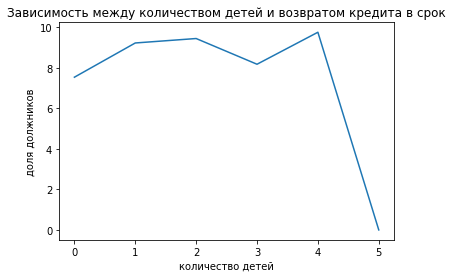

In [238]:
plt.title('Зависимость между количеством детей и возвратом кредита в срок')
plt.xlabel('количество детей')
plt.ylabel('доля должников')
plt.plot(children_depend['Доля должников'])

**Вывод: 
наличие задолженностей по кредитам среди клиентов без детей и клиентов, у которых до четырех детей, незначительно варьируется — от 7,5% до 9,8%. Среди самых многочисленных категорий клиентов — без детей, с 1 и 2 детьми — с ростом количества детей наблюдается рост доли просрочек. Задолженностей у клиентов с 5 детьми нет, но таких клиентов у банка всего 9. Также по графику видно, что клиенты, у которых трое детей, реже имеют задолженности по кредиту, чем семьи с двумя детьми. Наибольшее количество должников среди клиентов, у которых четверо детей. Таким образом прямой завимости между количеством детей и возвратом кредита в срок не прослеживается.** 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

**В данных, предоставленных банком, уже имеется категоризация клиентов по семейному положению. Чтобы проанализировать наличие зависимости между семейным положением и возвратом кредита в срок, сгруппируем данные по категории семейного положения и рассчитаем среднее значение в графе debt:**

In [239]:
family_stat_depend = pd.DataFrame()
family_stat_depend['Категория'] = data.groupby('family_status_id')['family_status'].unique()
family_stat_depend['Всего кредитополучателей'] = data.groupby('family_status_id')['debt'].count()
family_stat_depend['Всего должников'] = data.groupby('family_status_id')['debt'].sum()
family_stat_depend['Доля должников'] = data.groupby('family_status_id')['debt'].mean()
family_stat_depend['Доля должников'] = family_stat_depend['Доля должников'].apply(lambda x: round(x * 100, 2)) # приведем полученные данные к процентным значениям
family_stat_depend

,Категория,Всего кредитополучателей,Всего должников,Доля должников
family_status_id,,,,
0,[женат / замужем],12261,927,7.56
1,[гражданский брак],4134,385,9.31
2,[вдовец / вдова],951,63,6.62
3,[в разводе],1189,84,7.06
4,[Не женат / не замужем],2796,273,9.76


Построим график: 

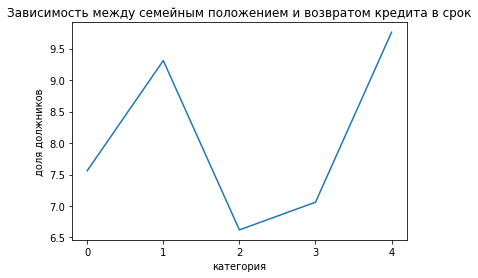

In [240]:
plt.title('Зависимость между семейным положением и возвратом кредита в срок')
plt.xlabel('категория')
plt.ylabel('доля должников')
plt.xticks(np.arange(0, 5, step=1)) # изменим шаг на оси x 
plt.plot(family_stat_depend['Доля должников'])

**Вывод: на графике сразу заметны выдающиеся значения — наибольшее число должников среди неженатых/незамужних клиентов и клиентов, живущих гражданским браком; меньше — среди женатых/замужних, разведенных и наименьшее количество среди вдовцов/вдов. Таким образом семейное положение влияет на возврат кредита в срок.**



#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Ранее мы категоризировали клиентов банка в зависимости от их дохода следующим образом:**

- 1000001 и выше — 'A';
- 200001–1000000 — 'B';
- 50001–200000 — 'C';
- 30001–50000 — 'D';
- 0–30000 — 'E'.

**Составим сводную таблицу: категория, всего кредитополучателей, всего должников, доля должников. Сгруппируем данные столбца total_income_category и посчитаем среднее значение в столбце debt:**

In [241]:
income_depend = pd.DataFrame()
income_depend['Всего кредитополучателей'] = data.groupby('total_income_category')['debt'].count()
income_depend['Всего должников'] = data.groupby('total_income_category')['debt'].sum()
income_depend['Доля должников'] = data.groupby('total_income_category')['debt'].mean()
income_depend['Доля должников'] = income_depend['Доля должников'].apply(lambda x: round(x * 100, 2)) # приведем полученные данные к процентным значениям
income_depend


,Всего кредитополучателей,Всего должников,Доля должников
total_income_category,,,
A,25,2,8.00
B,5014,354,7.06
C,15921,1353,8.50
D,349,21,6.02
E,22,2,9.09


Построим график:

<AxesSubplot:title={'center':'Зависимость между уровнем дохода и возвратом кредита в срок'}, xlabel='total_income_category', ylabel='доля должников'>

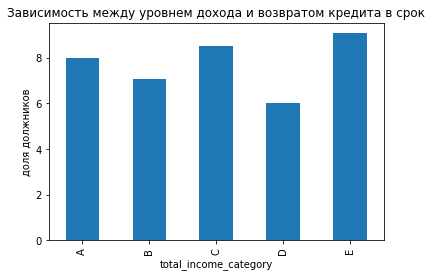

In [242]:
plt.title('Зависимость между уровнем дохода и возвратом кредита в срок')
plt.xlabel('категория')
plt.ylabel('доля должников')
income_depend['Доля должников'].plot.bar()

**Вывод: 
из таблицы видно, что категории кредитополучателей А и Е немногочисленные: клиентов в этих категориях 25 и 22 соответственно. К категории D относится всего 349 клиентов. Сравнивая самые многочисленные категории — В (доход от 200 тысяч до 1 миллиона) и С (доход от 50 до 200 тысяч), наблюдаем: среди клиентов категории В — с более высоким уровнем доходов — доля должников меньше, чем в категории С.** 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [245]:
purpose_depend = pd.DataFrame()
purpose_depend['Всего кредитополучателей'] = data.groupby('purpose_category')['debt'].count()
purpose_depend['Всего должников'] = data.groupby('purpose_category')['debt'].sum()
purpose_depend['Доля должников'] = data.groupby('purpose_category')['debt'].mean()
purpose_depend['Доля должников'] = purpose_depend['Доля должников'].apply(lambda x: round(x * 100, 2)) # приведем полученные данные к процентным значениям
purpose_depend

,Всего кредитополучателей,Всего должников,Доля должников
purpose_category,,,
операции с автомобилем,4279,400,9.35
операции с недвижимостью,10751,780,7.26
получение образования,3988,369,9.25
проведение свадьбы,2313,183,7.91


<AxesSubplot:title={'center':'Влияние цели кредита на его возврат в срок'}, xlabel='purpose_category', ylabel='доля должников'>

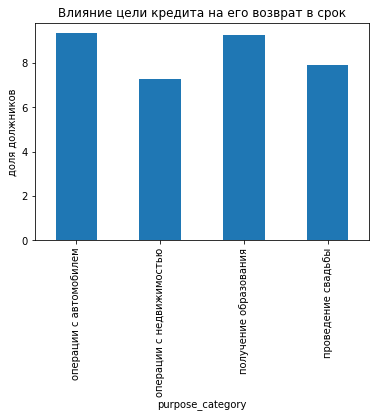

In [244]:
plt.title('Влияние цели кредита на его возврат в срок')
plt.ylabel('доля должников')
purpose_depend['Доля должников'].plot.bar()

**Вывод: наибольшее число задолженностей по кредитам на операции с автомобилем, примерно такое же количество задолженностей по кредитам на образование; меньше — по кредитам на проведление свадьбы и операции с недвижимостью.** 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*В исходных данных пропуски были в графах total_income и days_employed. Возможно, эти данные не предоставили клиенты банка при заполнении анкеты: например, если человек не работает, то он не сможет указать свой доход. Если поле не является обязательным для заполнения, то его могли просто пропустить. Другой возможной причиной могут быть ошибки при обработке или выгрузке данных.*

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Для пропусков в количественных переменных лучше использовать медианное значение, так как среднее значение может неточно отражать положение вещей. Например, в данных банка у большого количества клиентов было указано количество отработанных дней более 300 тысяч, что составляет 821 год. Заполнение пропусков в этом столбце средним значением привело бы к искажению результатов.* 

### Шаг 4: общий вывод.

**Предварительная обработка данных**

В ходе работы над проектом были изучены данные, предоставленные банком:
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

*Устранение пропусков и аномальных значений*

В ходе предварительной обработки в данных были обнаружены и устранены дубликаты, а также пропуски в столбцах total_income и days_employed. Пропуски в данных могли появиться вследствие того, что эти данные не предоставили клиенты при заполнении анкеты: например, если человек не работает, то он не сможет указать свой доход. Если поле не является обязательным для заполнения, то его могли просто пропустить. Другой возможной причиной могут быть ошибки при обработке или выгрузке данных. Пропуски в столбцах total_income и days_employed были заменены медианными значениями по соответстующей категории клиентов. 
В столбце days_employed в двух категориях клиентов — безработные и пенсионеры — были обнаружены аномальные значения: указано количество отработанных дней более 300 тысяч, что составляет 821 год. Строки с такими значениями были оставлены без изменений. Также в столбце days_employed обнаруженные отрицательные значения были заменены на положительные. Обнаружены и устранены путем удаления строк аномальные значения в столбце children — -1 и 20. 

*Категоризация данных*

Была произведена категоризация кредитополучателей по размеру дохода:
- 0–30000 — E;
- 30001–50000 — D;
- 50001–200000 — C;
- 200001–1000000 — В;
- 1000001 и выше — A.

Столбец total_income_category был добавлен в исходный DataFrame.

Также была произведена категоризация целей кредита, добавлен столбец purpose_category: 

- операции с автомобилем,
- операции с недвижимостью,
- проведение свадьбы,
- получение образования. 

**Исследование данных**

Были исследованы данные с целью получения ответа на вопросы: 
1. Есть ли зависимость между количеством детей и возвратом кредита в срок?
2. Есть ли зависимость между семейным положением и возвратом кредита в срок?
3. Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4. Как разные цели кредита влияют на его возврат в срок?


1. Наличие задолженностей по кредитам среди клиентов без детей и клиентов, у которых до четырех детей, незначительно варьируется — от 7,5% до 9,8%. Среди самых многочисленных категорий клиентов — без детей, с 1 и 2 детьми — с ростом количества детей наблюдается рост доли просрочек. Задолженностей у клиентов с 5 детьми нет, но таких клиентов у банка всего 9. Клиенты, у которых трое детей, реже имеют задолженности по кредиту, чем семьи с двумя детьми. Наибольшее количество должников среди клиентов, у которых четверо детей. Таким образом прямой завимости между количеством детей и возвратом кредита в срок не прослеживается. Полученные значения неоднозначные, возможно, стоит расширить выборку и повторно изучить этот вопрос.

2. Наибольшее число должников среди неженатых/незамужних клиентов и клиентов, живущих гражданским браком; меньше — среди женатых/замужних, разведенных и наименьшее количество среди вдовцов/вдов. Таким образом семейное положение влияет на возврат кредита в срок.

3. Категории кредитополучателей А и Е немногочисленные: клиентов в этих категориях 25 и 22 соответственно. К категории D относится всего 349 клиентов. Сравнивая самые многочисленные категории — В (доход от 200 тысяч до 1 миллиона) и С (доход от 50 до 200 тысяч), наблюдаем: среди клиентов категории В — с более высоким уровнем доходов — доля должников меньше, чем в категории С. Выборка несбалансирована, но прослеживается зависимость между уровнем дохода и возвратом кредита в срок в категориях В и С.

4. Наибольшее число задолженностей по кредитам на операции с автомобилем, примерно такое же количество задолженностей по кредитам на образование; меньше — по кредитам на проведление свадьбы и операции с недвижимостью.

Таким образом, изучив полученные данные, можно сделать следующие выводы:
среди клиентов без детей, с 1 и 2 детьми прослеживается рост количества задолженностей по кредитам. По остальным категориям (3, 4 и 5 детей) данные несбалансированы, сделать однозначный вывод не представляется возможным. Семейное положение влияет на возврат кредита в срок — чаще всего должниками оказываются неженатые/незамужние клиенты, и клиенты, живующие в гражданском браке. Уровень дохода влияет на возврат кредита в срок, зависимость прослеживается только среди клиентов категории В и С: среди клиентов с более высоким уровнем дохода доля должников меньше. Остальные категории слишком малочисленны для анализа. Цель кредита влияет на возврат кредита в срок: нибольшее число задолженностей по кредитам на операции с автомобилем и на образование.

Был выявлен ряд проблем, затрудняющих проведение анализа: 
- несбалансированные выборки по доходам клиентов и количеству детей. Для более точного анализа нужны сбалансированные выборки;
- пропуски в столбцах total_income и days_employed. Пропуски могли возникнуть вследствие того, что клиенты не указали информацию при заполнении анкеты, если эти поля не являются обязательными, а также при выгрузке данных;
- аномальные значения в столбцах days_employed и children. Выбросы в данных могут появляться например из-за ошибок ввода, если не предъявляются требования к формату, а также при выгрузке данных. 